<img src="img/anu-logo.png" height="30">

<h1 align='center'> COMP2420 - Introduction to Data Management, <br/>Analysis and Security</h1>

<h2 align='center'>Mid-Semester Exam 2022</h2>

*****

## Instructions

|**Maximum Marks**         |  **100**
|--------------------------|--------
|  **Weightage**           |  **14%** of the Total Course Grade
|  **Duration**            |  **15 min** Reading + **90 min** Typing
|  **Permitted Material**  |  This is an open book exam. Any course </br> or online material can be used

* There are four questions.  All answers are to be submitted via gitlab before the end of the exam time period.
* **DO** save your changes frequently, so that you do not lose your work!  **DO NOT** change the names of the directories or of the files.
* You can import any additional Python modules you may need for your analysis in the first code block. **DO NOT** try to install any modules other than those present in the Anaconda distribution. 
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.
* You will be marked on **correctness** and **readability** of your code/analysis/explanation. If your marker can't understand your code/analysis/explanation, then marks may be deducted. 
* You are **NOT** expected to import other modules.

In [2]:
# Imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier      
from sklearn.preprocessing import LabelEncoder          
from sklearn.preprocessing import StandardScaler       
from sklearn.model_selection import train_test_split    
from sklearn.metrics import confusion_matrix
from scipy import stats
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import operator
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold # Scikit-learn K-Folds cross-validator
from sklearn.model_selection import cross_val_score # evaluating cross-validator performance
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # KFold configuration   

*****
## Question 1: Short Answer _[10 marks]_ 

Answer the following questions in the raw cell left below the question.

    
#### 1.0) Explain what the R-squared statistic is and what you would use it for.  What does an R-squared value of 1 mean?

<span style= 'float: right;'><b>[2 marks]</b></span>

#### 1.1) Consider we have a dataset containing all students in comp2420/6420 with four attributes: 
- ```anu_student_id```, 
- ```weight```, 
- ```height``` and 
- ```sex```. 

We want to build a decision tree model to predict ```sex``` by using all of the three ```student_id```, ```weight```, ```height``` features in the dataset. We use ```LabelEncoder``` to process the ```anu_student_id``` and ```sex```. The numbers of females and males are about the same in the dataset. Assuming you use the ```DecisionTreeClassifier``` from **sklearn** with default parameters and you randomly select 80% of the data for training and 20% for testing, without actually training the model, explain

(a) What will be the approximate expected train score of the decision tree model and why?

(b) What will be the approximate test score of the decision tree model and why?

<span style= 'float: right;'><b>[4 marks]</b></span>

#### 1.2) Consider a dataset that has two features ```x1``` and ```x2```, and you want to build a KMeans model with ```k=2```. You initialize the two centroids ```c1``` (the orange dot) and ```c2``` (the green dot) for the model. What problem can you see here and how can you solve it?

<span style= 'float: right;'><b>[4 marks]</b></span>

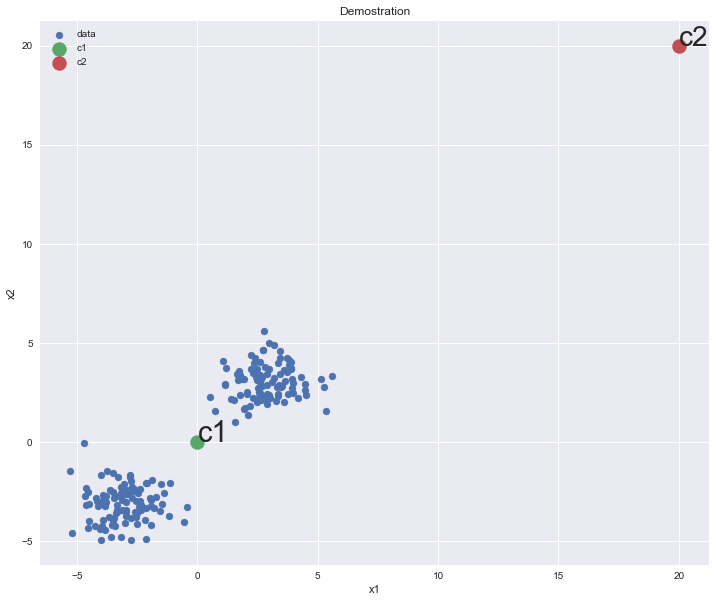

In [3]:
#For demostration purpose. do not change this cell.
c1 = np.random.normal(3,1,(100,2))
c2 = np.random.normal(-3,1,(100,2))
c = np.concatenate((c1,c2),0)
fig = plt.figure(figsize=(12,10))
plt.scatter(c[:,0], c[:,1], label='data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(0,0,label='c1',s = 200)
plt.text(0,0,"c1",fontsize=29)
plt.scatter(20,20,label='c2', s = 200)
plt.text(20,20,"c2",fontsize=28)
plt.title('Demostration')
plt.legend()
plt.show()

____
## Question 2: Data Analysis & Visualisation _[30 marks]_

In this section, we will be exploring an income dataset extracted from the census bureau database. The dataset contains n = 32561 clients' income.

The below table is a description of the dataset:


| Field |  Description |
| ---: | :-------------------------- | 
| `age` | Age of the client. |
| `education` | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
| `education-num` | Numerical education level. |
| `occupation` | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
| `race` | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. |
| `sex` | Female, Male. |
| `hours-per-week` | Working hours per week. |
| `class` | annual income: >50K, <=50K. |

#### 2.0) Import the Data
- Import the data from (`CensusIncome.csv`) in the data directory to a dataframe.
- Print out the first 5 rows of the data set along with the names of the columns.
<span style= 'float: right;'><b>[2 marks]</b></span>

In [9]:
### YOUR CODE HERE ###
data = pd.read_csv('./data/CensusIncome.csv')
data.head(5)

,occupation,race,sex,age,education,education-num,hours-per-week,class
0,Adm-clerical,White,Male,39,Bachelors,13,40,<=50K
1,Exec-managerial,White,Male,50,Bachelors,13,13,<=50K
2,Handlers-cleaners,White,Male,38,HS-grad,9,40,<=50K
3,Handlers-cleaners,Black,Male,53,11th,7,40,<=50K
4,Prof-specialty,Black,Female,28,Bachelors,13,40,<=50K


#### 2.1) List the top 5 occupations with the longest average `hours-per-week`.

<span style= 'float: right;'><b>[3 marks]</b></span>


In [10]:
### YOUR CODE HERE: top 5 occupations with the longest average hours-per-week ###
occupation_list = data['occupation'].unique()
occupation_list
dict_ = dict()
for occupation in occupation_list:
    dict_[occupation] = data.loc[data['occupation']==occupation, 'hours-per-week'].mean()
    # List the top 5 by hours

sorted_d = dict(sorted(dict_.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_d)
print()
print("Thhe top 5 occupation with longest average hours per week are:")

i = 0
j = 1
for key in sorted_d.keys():
    if (i != 5):
        print(j,key)
        i = i+1
        j = j+1

{'Farming-fishing': 46.989939637826964, 'Exec-managerial': 44.9877029021151, 'Transport-moving': 44.65623043206011, 'Protective-serv': 42.87057010785824, 'Prof-specialty': 42.38671497584541, 'Craft-repair': 42.30422054159551, 'Sales': 40.78109589041096, 'Machine-op-inspct': 40.755744255744254, 'Armed-Forces': 40.666666666666664, 'Tech-support': 39.432112068965516, 'Handlers-cleaners': 37.947445255474456, 'Adm-clerical': 37.55835543766578, 'Other-service': 34.70166919575114, 'Priv-house-serv': 32.88590604026846, '?': 31.90613130765057}

Thhe top 5 occupation with longest average hours per week are:
1 Farming-fishing
2 Exec-managerial
3 Transport-moving
4 Protective-serv
5 Prof-specialty


In [11]:
data.groupby(['occupation']).mean()['hours-per-week'].sort_values(ascending=False).iloc[:5]

occupation
Farming-fishing     46.989940
Exec-managerial     44.987703
Transport-moving    44.656230
Protective-serv     42.870570
Prof-specialty      42.386715
Name: hours-per-week, dtype: float64

#### 2.2) Visualise the distribution of `hours-per-week` for each of the top 5 occupations in one figure.   Explain why you chose the visualisation method you used and why how it is suited to the data being analysed.

<span style= 'float: right;'><b>[5 marks]</b></span>


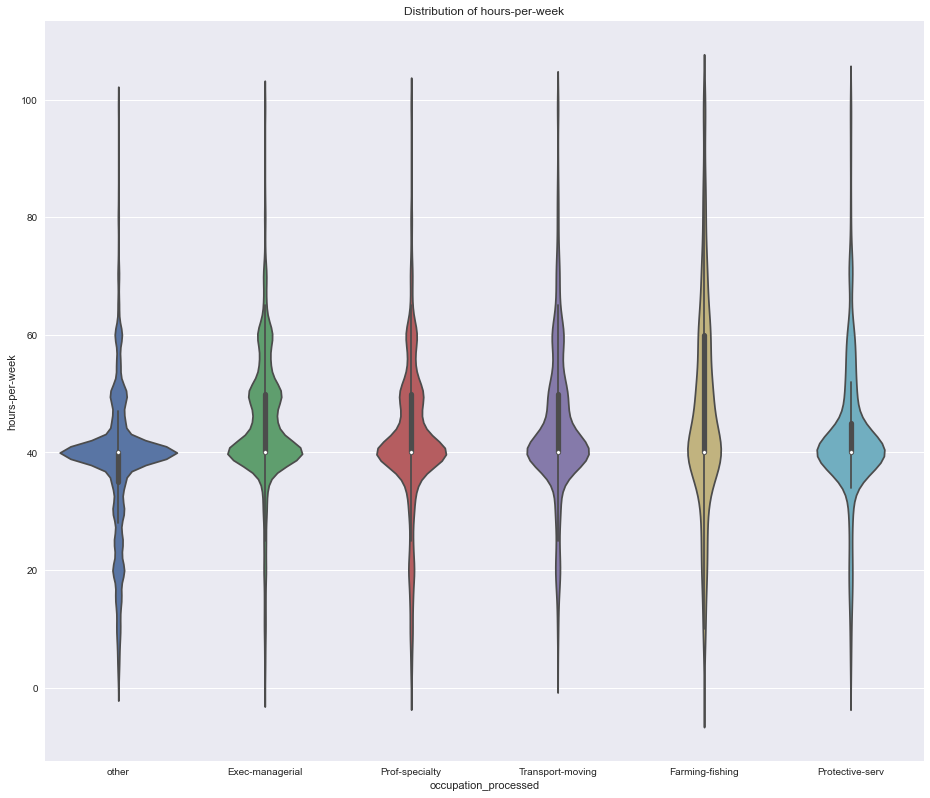

In [12]:
### YOUR CODE HERE:  hours-per-week distribution for each of the top 5 occupations ###
top_5_occupation = data.groupby(['occupation']).mean()['hours-per-week'].sort_values(ascending=False).iloc[:5].index
plot_data = data[['occupation','hours-per-week', "class"]]
plot_data['occupation_processed'] = plot_data['occupation'].apply(lambda x: x if x in top_5_occupation else 'other')
plot = sns.catplot(x="occupation_processed", y='hours-per-week', kind="violin", split=True, data=plot_data)
plot.fig.set_size_inches(15,12)
plt.title("Distribution of hours-per-week")
plt.show()

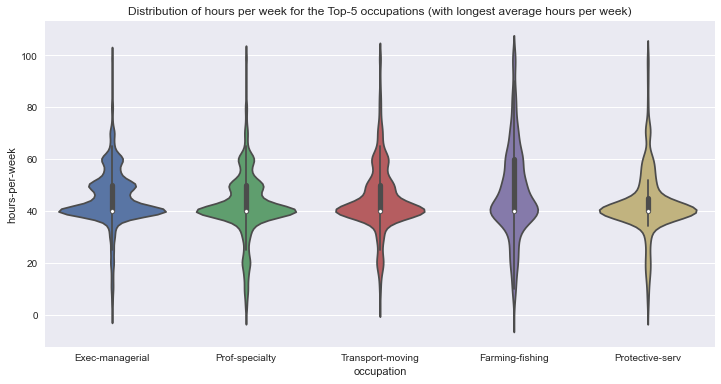

In [13]:
top_5_occupation = data.groupby(['occupation']).mean()['hours-per-week'].sort_values(ascending=False).iloc[:5].index
plot_data = data[data.occupation.isin(top_5_occupation)][['occupation','hours-per-week']]
plt.figure(figsize=[12,6])
sns.violinplot(data=plot_data, x="occupation", y="hours-per-week")
plt.title("Distribution of hours per week for the Top-5 occupations (with longest average hours per week)");

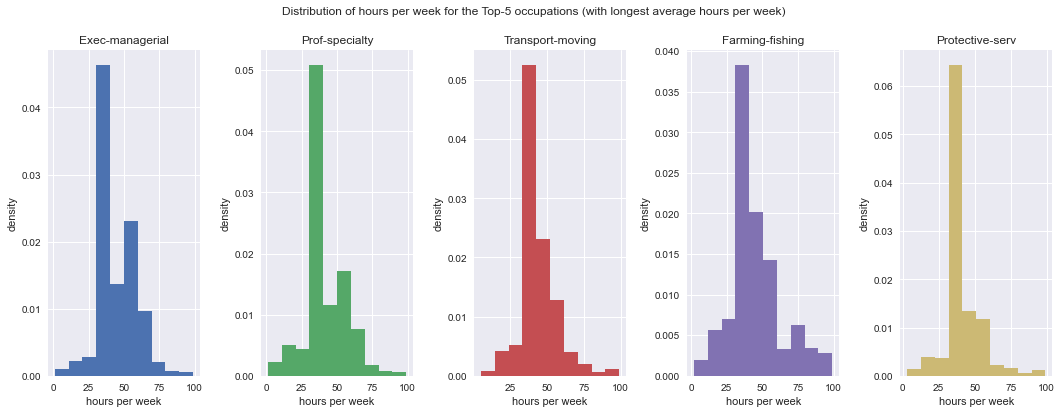

In [14]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'] # you can also manually specify some colour values

plt.figure(figsize=[18,6])
for i, oc in enumerate(plot_data.occupation.unique()):
    plt.subplot(1,len(top_5_occupation),i+1) 
    plt.hist(plot_data[plot_data.occupation==oc]['hours-per-week'], density=True, color=colors[i])
    plt.xlabel("hours per week")
    plt.ylabel("density")
    plt.title(oc)
plt.subplots_adjust(wspace=0.4)
plt.suptitle("Distribution of hours per week for the Top-5 occupations (with longest average hours per week)");

#### 2.3) You were discussing work life balance with some friends and some were wondering if longer hours of working imply higher income levels. How can you use this data set to investigate the relationship between working longer hours and higher income levels?  Plot a figure to help illustrate your analysis and explain what relationship you can see.
<span style= 'float: right;'><b>[10 marks]</b></span>

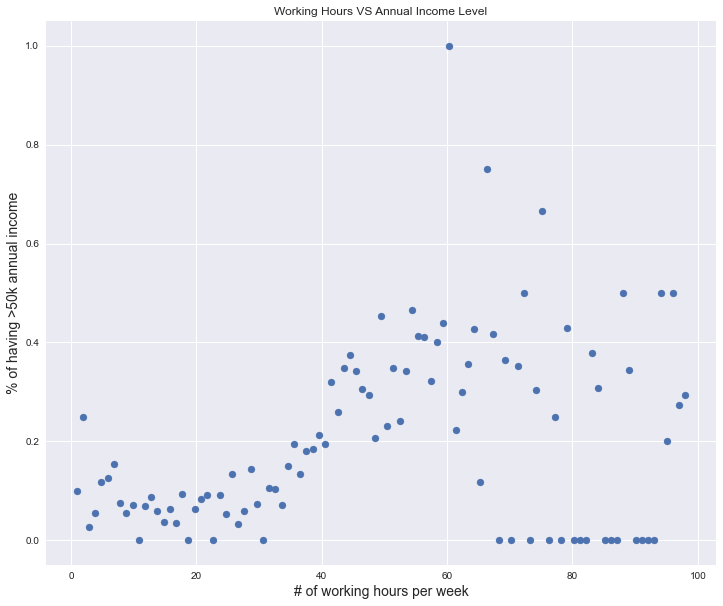

In [15]:
### YOUR CODE HERE###|
# for each divide all working hours into 100 different categories and record the average rate of having >50k income
min_hr = min(data['hours-per-week'])-0.1
max_hr = max(data['hours-per-week'])
bins = np.linspace(min_hr,max_hr,100)
d = {}

for i in range(len(bins)-1):
    sub_data = data['class'][(data['hours-per-week'] > bins[i]) & (data['hours-per-week'] <= bins[i+1])]
    sub_data = sub_data.value_counts()/len(sub_data)
    try:
        d[bins[i]] = sub_data.loc['>50K']
    except:
        d[bins[i]] = 0
        
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(d.keys(),d.values())
ax.set_xlabel('# of working hours per week', fontsize=14)
ax.set_ylabel('% of having >50k annual income', fontsize=14)
ax.set_title('Working Hours VS Annual Income Level')
plt.show()


#### 2.4) Are the working hours between females and males statistically different? You need to state clearly your null hypothesis, alternative hypothesis, and the conclusion and also justify the test you used. 
<span style= 'float: right;'><b>[10 marks]</b></span>

In [16]:
### YOUR CODE HERE ###
hrs_male = data['hours-per-week'][data['sex']=='Male']
hrs_female = data['hours-per-week'][data['sex']=='Female']

t, p = stats.ttest_ind(hrs_male, hrs_female)

if p < 0.05:
    print(f'p value is {p}, therefore we reject the null hypothesis and conclude the working hours between females and males are statistically different')
else:
    print(f'p value is {p}, therefore we fail to reject the null hypothesis and conclude the working hours between females and males are not statistically different')
   

p value is 0.0, therefore we reject the null hypothesis and conclude the working hours between females and males are statistically different


____
## Question 3: Classification _[30 Marks]_

In this section, we will keep using the income dataset in Question 2. **Take note of the column `class` being annual income, the prediction task is to determine whether a person makes over 50K a year or not.**

#### 3.0) Further Exploration
#### 3.0.0) Are there any missing values in the dataset? (*hint: consider only null values. i.e. "?" is not a missing value*)
- Report the number of missing values for each of the attributes. If there are missing values, justify how you handled them.
<span style= 'float: right;'><b>[2 marks]</b></span>


In [70]:
### YOUR CODE HERE ###
df.isna().any()

occupation        False
race              False
sex               False
age               False
education         False
education-num     False
hours-per-week    False
class             False
dtype: bool

#### 3.0.1) What is the distribution of the target variable?
- Report the number of values in each class.
- Report the ratio of each class in the target variable.

<span style= 'float: right;'><b>[4 marks]</b></span>

In [17]:
### YOUR CODE HERE for number of values in each class
df['class'].value_counts()

<=50K    24720
>50K      7841
Name: class, dtype: int64

In [18]:
### YOUR CODE HERE for ratio of each class in the target variable
data['class'].value_counts()/len(data['class'])

<=50K    0.75919
>50K     0.24081
Name: class, dtype: float64

#### 3.1) Preprocessing and splitting the dataset

You need to 
1) preprocess the dataset (*Hint*: try to encode **Categorical Variables** to appropriate forms and **drop** unwanted variables) and justify each transformation/modification you performed. 

2) split the dataset to train and test sets. You may choose whatever test/train split you wish but be sure to explicitly state what you have chosen. **Note: make sure you dropped the first level when using one-hot encoding.**
<span style= 'float: right;'><b>[4 marks]</b></span>

In [19]:
### YOUR CODE HERE ###
data_X = data[['occupation', 'race', 'sex','age', 'education-num', 'hours-per-week']] # we don't need education and education-num already includes all information.
data_y = data['class']

#transform target variable
le = LabelEncoder()
data_y = le.fit_transform(data_y)

#process X
cate_variable_names = ['occupation', 'race', 'sex'] # categorical variable
continous_variable_names = ['age', 'education-num', 'hours-per-week']
data_X_processed = pd.concat((data_X[continous_variable_names],pd.get_dummies(data_X[cate_variable_names], drop_first=True)),1) 

#split dataset
data_train_X, data_test_X, data_train_y, data_test_y = train_test_split(data_X_processed, data_y, test_size = 0.2)

#### 3.2) Fit the Logistic Regression Model

Now you need to **fit the data using a logistic regression model**. When creating the model instance, make sure the model has an intercept and use `max_iter=2000` to allow more iterations for the model to converge. After creating the model, **get the coefficients assigned to each feature of the training data**. You'll need to match the order of the coefficients to the order of the predictors when you fit the model.
<span style= 'float: right;'><b>[8 marks]</b></span>

In [20]:
### YOUR CODE HERE ###
lr = LogisticRegression(max_iter=2000)
lr_model = lr.fit(data_train_X, data_train_y)

# output the results
categories = data_train_X.columns
print("Intercept is", int(lr_model.intercept_))
for i, coef in enumerate(lr_model.coef_.T):
    print("Coefficient for", categories[i], "is", coef[0])


Intercept is -9
Coefficient for age is 0.04448573671582837
Coefficient for education-num is 0.2683137856642176
Coefficient for hours-per-week is 0.03155312034904751
Coefficient for occupation_Adm-clerical is 0.6841711773486004
Coefficient for occupation_Armed-Forces is -0.0425852702870331
Coefficient for occupation_Craft-repair is 0.7876384219436326
Coefficient for occupation_Exec-managerial is 1.5123094748971646
Coefficient for occupation_Farming-fishing is -0.40803548969071407
Coefficient for occupation_Handlers-cleaners is -0.10634493649760038
Coefficient for occupation_Machine-op-inspct is 0.48050562919335105
Coefficient for occupation_Other-service is -0.407251157780637
Coefficient for occupation_Priv-house-serv is -1.1223765377754784
Coefficient for occupation_Prof-specialty is 1.1745047092542351
Coefficient for occupation_Protective-serv is 1.1521442627786673
Coefficient for occupation_Sales is 0.9303318781361849
Coefficient for occupation_Tech-support is 1.2111046501571654
Coef

#### 3.3 Result Analysis

#### 3.3.0. **Report the mean accuracy on the training and the testing dataset.**
<span style= 'float: right;'><b>[2 marks]</b></span>

In [21]:
### YOUR CODE HERE ###
train_score = lr_model.score(data_train_X, data_train_y)
test_score = lr_model.score(data_test_X, data_test_y)
print(f"Train Score: {train_score:.4f}; Test Score: {test_score:.4f}")

Train Score: 0.8090; Test Score: 0.8122


#### 3.3.1. **Based on the coefficients you found in 3.2, analyse the effect of `age`,  `education-num`, and `hours-per-week`** (e.g. positive or negative) on income level `>50K` and `<=50K`.
<span style= 'float: right;'><b>[3 marks]</b></span>

#### 3.3.2. **Is the Logistic Regression model you implemented overfitting or underfitting? Why?**
<span style= 'float: right;'><b>2 marks]</b></span>

#### 3.3.3. **Based on the confusion matrix, calculate the *recall*, *precision*, *accuracy* and *f1 score* of the model on the test set. Based on the results, interpret the stengths and weaknesses of the model on the dataset**.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [22]:
### YOUR CODE HERE ###
tn, fp, fn, tp = confusion_matrix(data_test_y, lr_model.predict(data_test_X)).ravel()

recall = tp/(tp+fn)
prec = tp/(tp+fp)
acc = (tp+tn)/(tp+fp+fn+tn)
f1 = (2*recall*prec)/(recall+prec)
print("Recall:   ", recall,
    "\nPrecision:", prec,
    "\nAccuracy: ", acc,
    "\nF1 Score: ", f1)

Recall:    0.43324775353016687 
Precision: 0.6650246305418719 
Accuracy:  0.8122217104253032 
F1 Score:  0.5246793626117373


____
## Question 4: Linear Regression _[30 Marks]_
In this question, we are looking at a dataset `supercon.csv` of material and a number of their properties (six properties).  The dataset contains entries for almost 16,000 materials, with the first six columns containing properties relating to atomic mass, electric and magnetic parameters of each material, and the last column containing the critical temperatures $T_{c}$, which are temperatures at which the particular material transitions into a superconducting state (in which a direct electric current can flow through the material without resistivity). The six parameters are only a fraction of a larger parameter set which *may* affect the value of $T_{c}$. 

We are not concerned here with the larger parameter set but will focus on the six parameters given in the dataset.  We will just mention that normally microscopic theory is used to determine the transition   to a superconducting state ((i.e. the critical temperature $T_{c}$)) using complex calculations involving the different parameters.  
The below table is a description of the dataset:

| Field |  Description |
| ---:| :--- |
| `MeanAtomicMass` | Mean atomic mass |
| `MeanAtomicValN`| Mean atomic valence number |
| `MeanAtomicMagnM`| Mean atomic magnetic moment |
| `MeanAtomicElNeg`| Mean atomic electronegativity |
| `MaxDiffAtomicMass`| Maximum difference of atomic mass |
| `MaxDiffAtomicElNeg`| Maximum difference of atomic electronegativity |
| `T_c(K)` | Critical Temperature (in Kelvin) |

We aim to use a simple machine learning approach, involving linear regression, and determine which of the six given material parameters _may_ affect the critical temperature $T_{c}$, and therefore may be included in one of the microscopic models studied by physicists.

**NOTE:** Marks will be awarded for the steps taken in the development of the model as well as the accuracy of your final model.

#### 4.0) Your **first task** is to import the data from the `supercon.csv` file (located in the `data` subdirectory), and prepare it for the subsequent analysis. 

<span style= 'float: right;'><b>[2 marks]</b></span>



In [33]:
### YOUR CODE HERE ###
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression

data = pd.read_csv('./data/supercon.csv')
column_names = data.columns
print(len(data))
data.head()

15819


,MeanAtomicMass,MeanAtomicValN,MeanAtomicMagnMom,MeanAtomicElNeg,MaxDiffAtomicMass,MaxDiffAtomicElNeg,T_c(K)
0,51.67,4.04,1.44,2.51,124.91,2.55,44.00
1,114.04,6.63,3.00,1.84,39.05,1.10,6.14
2,141.22,3.94,1.94,1.78,113.33,0.86,3.94
3,173.90,5.00,3.16,1.51,88.04,0.10,4.54
4,81.50,2.31,0.84,1.73,121.33,2.55,56.00


In [34]:
# It would also be a good idea to standardise the features (optional)
ss = StandardScaler()
for col in column_names[:-1]:
   ss.fit(np.array(data[col]).reshape(-1,1))
   data[col] = ss.transform(np.array(data[col]).reshape(-1,1))
   
   # or you can do both fit and transform using one line
   # data[col] = ss.fit_transform(np.array(data[col]).reshape(-1,1))   
   
data.head()

,MeanAtomicMass,MeanAtomicValN,MeanAtomicMagnMom,MeanAtomicElNeg,MaxDiffAtomicMass,MaxDiffAtomicElNeg,T_c(K)
0,-0.671210,-0.459389,-0.556716,0.947328,0.106894,0.802030,44.00
1,1.047982,1.598902,1.086746,-0.775492,-1.466734,-0.701048,6.14
2,1.797183,-0.538859,-0.029965,-0.929774,-0.105342,-0.949834,3.94
3,2.697989,0.303530,1.255306,-1.624045,-0.568853,-1.737654,4.54
4,0.151036,-1.834231,-1.188817,-1.058343,0.041280,0.802030,56.00


#### 4.1) Your **next task** is to build a linear regression model which can predict the value of the critical temperature ("target") given the material parameters ("predictors"). You will have to determine values of _intercept_ $\beta_{0}$ and six _coefficients_ $\beta_{i}$ to use for predicting $T_{c}$. 

$$
T_{c} = \beta_{0} + \sum_{i=1}^{6}\beta_{i}\cdot predictor_{i}
$$

**Note** You are expected to split the dataset into training and testing tests before training the model. 

<span style= 'float: right;'><b>[10 marks]</b></span>

In [35]:
train_data, test_data = train_test_split(data, train_size = 0.8, random_state=2) 

# Training Data
train_input  = train_data[data.columns[:-1]]  # get all the columns except the last column 
train_output = train_data[data.columns[-1]]  # only get the last column 

# Testing Data
test_input  = test_data[data.columns[:-1]]  # get all the columns except the last column 
test_output = test_data[data.columns[-1]] # only get the last column 

lr = LinearRegression() 

model = lr.fit(train_input, train_output) 

b0 = model.intercept_ 
print(f'The model intercept: {b0}') 

bs = model.coef_ # regression slopes 
print(f'The model coefficients: \n{", ".join([name + ":"+  str(round(c,5)) for name, c in zip(data.columns[:-1], bs)])}')

The model intercept: 33.12753662197617
The model coefficients: 
MeanAtomicMass:-0.64529, MeanAtomicValN:-8.62572, MeanAtomicMagnMom:-0.69934, MeanAtomicElNeg:1.41494, MaxDiffAtomicMass:3.40942, MaxDiffAtomicElNeg:16.1578


#### 4.2) Discuss the regression model you have built in terms of what the values of the intercept and regression coefficients are indicating.  
<span style= 'float: right;'><b>[6 marks]</b></span>

#### 4.3) Your next task is to evaluate your regression model's performance on both the training and testing data subsets.  Print your model's scores for both the training and testing data.
***NOTE***:
Don't worry if the scores are appearing to be low as this is a very preliminary analysis using a limited feature set.

<span style= 'float: right;'><b>[6 marks]</b></span>

In [36]:
### YOUR CODE HERE ###
print("Evaluating using the training set:")
print("The R-squared value:", model.score(train_input, train_output))  #get the R-squared value
print("The co-relation co-efficient:", np.sqrt(model.score(train_input, train_output))) # the corelation coefficient
print()
print("Evaluating using the testing set:")
print("The R-squared value:", model.score(test_input, test_output)) # #get the R-squared value
print("The co-relation co-efficient:", np.sqrt(model.score(test_input, test_output))) # the corelation coefficient
model.score

Evaluating using the training set:
The R-squared value: 0.4927821771088525
The co-relation co-efficient: 0.7019844564581559

Evaluating using the testing set:
The R-squared value: 0.48779259737447356
The co-relation co-efficient: 0.6984215040893812


<bound method RegressorMixin.score of LinearRegression()>

#### 4.4) What is the metric(s) you used to evaluate your model's performance in question 4.3? Interpret and discuss the scores you obtained for the training and test sets.

<span style= 'float: right;'><b>[6 marks]</b></span>

#### 4.5) **(for COMP6420 students only)** You now want to investigate how critical temperature `T_c(K)` is affected by `MeanAtomicElNeg` in your dataset on its own.  Your task is therefore to generate a figure containing a scatter plot for the `T_c(K)` vs `MeanAtomicElNeg`, and also plot the line given by the regression model between `T_c(K)` and `MeanAtomicElNeg`.
 (*hint: like we did in Lab 4*).

<span style= 'float: right;'><b>[8 marks]</b></span>

The model intercept: 33.05038589587815
The model coefficient: 11.984989828169676


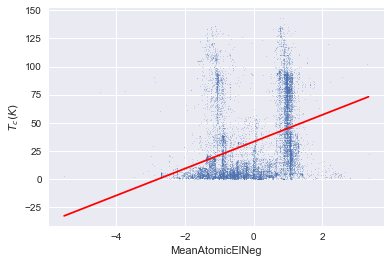

In [37]:
### YOUR CODE HERE ###

# Training another Linear Regression model to predict the T_c(K) using the one feature (MeanAtomicElNeg)
# Training Data
train_input2  = np.array(train_data['MeanAtomicElNeg']).reshape(-1, 1)  # get only the relevant column
train_output2 = train_data['T_c(K)'] # only get the target column

# Testing Data
test_input2  = np.array(test_data['MeanAtomicElNeg']).reshape(-1, 1)  # get only the relevant column
test_output2 = test_data['T_c(K)'] # only get the target column

lr2 = LinearRegression() # new model

model2 = lr2.fit(train_input2, train_output2)

b0 = model2.intercept_
print(f'The model intercept: {b0}')

bs = model2.coef_[0] # regression slope
print(f'The model coefficient: {bs}')

plt.scatter(data.MeanAtomicElNeg, data['T_c(K)'], alpha=0.5, s=0.15)
x_range = [train_input2.min(), train_input2.max()]
y_range = [b0+bs*x_range[0], b0+bs*x_range[1]]
plt.plot(x_range, y_range, 'r') # plotting the regression line
plt.xlabel('MeanAtomicElNeg')
plt.ylabel('$T_c(K)$');

#### 4.6) **(for COMP6420 students only)** Based on the plot in question 4.5, reflect on whether the linear regression model you implemented in question 4.5 is suitable or not. Justify your answer.

<span style= 'float: right;'><b>[4 marks]</b></span>

In [38]:
# The performance of the second model training using only one feature
print("Evaluating using the training set:")
print("The R-squared value:", model2.score(train_input2, train_output2))  #get the R-squared value
print("The co-relation co-efficient:", np.sqrt(model2.score(train_input2, train_output2))) # the corelation coefficient
print()
print("Evaluating using the testing set:")
print("The R-squared value:", model2.score(test_input2, test_output2)) # get the R-squared value
print("The co-relation co-efficient:", np.sqrt(model2.score(test_input2, test_output2))) # the corelation coefficient

Evaluating using the training set:
The R-squared value: 0.12343529387129748
The co-relation co-efficient: 0.35133359342837894

Evaluating using the testing set:
The R-squared value: 0.12619478024354136
The co-relation co-efficient: 0.35523904662007716
